In [2]:
# Setup Distributed Client
autostart = True
if autostart:
    pass # just let it use the dask lab extension cluster
else:
    from dask.diagnostics import ProgressBar
    from dask.distributed import Client
    from dask.distributed import LocalCluster
    # client = Client('localhost:8787') # Connect to old dashboard?
    try:
        client = Client('tcp://localhost:8786', timeout='2s')
    except OSError:
        cluster = LocalCluster(scheduler_port=8786)
        client = Client(cluster)
        
client

<Client: 'tcp://127.0.0.1:38141' processes=8 threads=40, memory=134.93 GB>

In [1]:
import sys
sys.path.insert(1,r"/export/data1/jbenjami/Code/Python/")
# sys.path.insert(1,r"/export/data1/jbenjami/Research_Schneider/Data/CMIP5/CFMIP2/python/")
print(sys.path)
import personal
import personal.plots
import numpy as np

from importlib import reload
import make_forcing
import modify_forcing
import xarray as xr
import os
import nc_time_axis
import cftime

import holoviews
import hvplot.xarray


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib widget
plt.close('all')

['/export/data1/jbenjami/Research_Schneider/Data/CMIP5/CFMIP2/python', '/export/data1/jbenjami/Code/Python/', '/export/data1/jbenjami/anaconda3/lib/python38.zip', '/export/data1/jbenjami/anaconda3/lib/python3.8', '/export/data1/jbenjami/anaconda3/lib/python3.8/lib-dynload', '', '/export/data1/jbenjami/.local/lib/python3.8/site-packages', '/export/data1/jbenjami/anaconda3/lib/python3.8/site-packages', '/export/data1/jbenjami/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/export/data1/jbenjami/.ipython']


In [3]:
model          = 'HadGEM2-A'
exper          = 'amip'
rip            = 'r1i1p1' # rip nomenclature, In the CMIP5 project, ensemble members are named in the rip-nomenclature, r for realization, i for initialisation and p for physics, followed by an integer, e.g. r1i1p1.
data_path      = '/export/data1/jbenjami/Research_Schneider/Data/CMIP5/CFMIP2/' # zhaoyi used /export/data1/zhaoyi/GCMForcedLES/cfmip2_output/'
ds             = None
f_root         = '/export/data1/jbenjami/Research_Schneider/Data/CMIP5/CFMIP2/southern_ocean_forcing/'


ds             = xr.open_mfdataset(f_root+'/'+model+'/'+exper+'/'+model+'_'+exper+'_'+rip+'*.nc', decode_cf=True, decode_times=True,combine='by_coords',data_vars="all", coords="minimal", compat="override",parallel=True, use_cftime=True)
ds

<xarray.Dataset>
Dimensions:  (lev: 38, site: 6, time: 144000)
Coordinates:
  * time     (time) object 2000-09-01 00:00:00 ... 2008-12-30 23:30:00
  * site     (site) int32 78 81 82 92 99 119
  * lev      (lev) float64 20.0 80.0 180.0 ... 2.922e+04 3.291e+04 3.925e+04
    lat      (site) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    lon      (site) float32 dask.array<chunksize=(6,), meta=np.ndarray>
Data variables:
    zg       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    ta       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    hus      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    ua       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    va       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    wap      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    cl       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    cli      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    clw      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    hur      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tnta     (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tnhusa   (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tntr     (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    ps       (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    ts       (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    rsdt     (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    hfls     (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    hfss     (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    pfull    (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    pr       (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    alpha    (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tntwork  (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tntva    (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tnhusva  (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tntha    (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tnhusha  (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
Attributes:
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    institute_id:           MOHC
    experiment_id:          amip
    source:                 HadGEM2-A (2009) atmosphere: HadGAM2 (N96L38);  l...
    model_id:               HadGEM2-A
    forcing:                GHG, Oz, SA, LU, Sl, Vl, BC, OC, (GHG = CO2, N2O,...
    parent_experiment_id:   N/A
    parent_experiment_rip:  N/A
    branch_time:            0.0
    contact:                chris.d.jones@metoffice.gov.uk,  mark.webb@metoff...
    history:                MOHC pp to CMOR/NetCDF convertor (version 1.10.4)...
    references:             Bellouin N. et al, (2007) Improved representation...
    initialization_method:  1
    physics_version:        1
    tracking_id:            0f5ad0f6-e54a-480b-a1f7-1674f2394457
    mo_runid:               akpcd
    product:                output
    experiment:             AMIP
    frequency:              subhr
    creation_date:          2011-12-18T02:38:09Z
    Conventions:            CF-1.4
    project_id:             CMIP5
    table_id:               Table cfSites (26 July 2011) 76cc5a96989ebb70010f...
    title:                  HadGEM2-A model output prepared for CMIP5 AMIP


In [21]:
# ds_alt = ds.assign_coords({'time':ds.time.dt.strftime('%Y-%m-%d %H:%M:%S')})
ds_alt = ds.assign_coords({'time':np.arange(len(ds.time))})
plot_data2 = ds_alt.isel(site=1).to_array().to_dataset() # stack to get better variable browser in menu on right

ds

In [4]:
ds3 = ds.assign_coords({'time': np.arange(len(ds.time))})
ds4 = ds3.isel(lev=ds3.lev<2e4)
ds4_log = np.log10(ds4)

groups = ('data', 'log data')
plot_data = {groups[0]:ds4.drop(['ps','ts','rsdt','hfls','hfss','pr']).to_array().to_dataset(name='regstack'), groups[1]:ds4_log.drop(['ps','ts','rsdt','hfls','hfss','pr']).to_array().to_dataset(name='logstack')}
cmap_0 = LinearSegmentedColormap.from_list("mycmap", [[1,1,1],[0,0,.5],[0,.5,0],'yellow',[1,0,0],'pink'],N=250)

is_geospatial, using holoviews


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
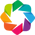

dropping extraneous coords ['lat', 'lon']
trying to get projection from data...
...failed, continuing with no projection
:Dataset   [lev,site,time,variable]   (regstack)
Rendering


Row
    [0] Param(Data_Explorer, expand_button=False)
    [1] ParamMethod(method)

In [69]:
# plot_data_ds['time']=plot_data_ds.time.compute()
# reload(personal.plots)
# personal.plots.data_map_viewer(ds4, projection=None,clim=(220,300),  cmap = 'Spectral',  plot_coasts=False,dynamic=False,plot_dims=['time','lev'],verbose=True, plot_engine  = holoviews.QuadMesh)#, yticks = [int(x) for x in plot_data_ds3.time.values],ylabels=ds.time.dt.strftime("%Y-%m-%d %H:%M:%S").values)
personal.plots.data_map_viewer(plot_data, projection=None, output_size=20, fig_size=(7200,1800), cmap = cmap_0,  plot_coasts=False,dynamic=False,plot_dims=['time','lev'],verbose=True, plot_engine  = holoviews.QuadMesh)#, yticks = [int(x) for x in plot_data_ds3.time.values],ylabels=ds.time.dt.strftime("%Y-%m-%d %H:%M:%S").values)

In [5]:
tt = plot_data['data']['regstack'].isel(time=np.arange(93000,95000)) #.compute()
# tt.hvplot.line(y='lev', dynamic=True, datashade=False,width=400,height=800, xlim=[200,300], ylim=[0,20000] )
tt.hvplot.line(y='lev', dynamic=True, datashade=False,width=400,height=800, ylim=[0,20000] ) 

:DynamicMap   [variable,site,time]
   :Curve   [regstack]   (lev)

In [37]:
d = ds.sel(site=82).isel(time=np.arange(93000,95000))
d['ta'].hvplot.line(y='lev', dynamic=True, datashade=False,width=1200,height=800, xlim=[200,300],ylim=[0,20000], legend=True, label='ta',shared_axes=False ) * \
(d['hus']*10e3+200).hvplot.line(y='lev', dynamic=True, datashade=False, label='hus' ) * \
(d['cli']*10e4+200).hvplot.line(y='lev', dynamic=True, datashade=False, label='cli', line_dash='dashed' ) * \
(d['clw']*10e4+200).hvplot.line(y='lev', dynamic=True, datashade=False, label='clw', line_dash='dashed' )

In [64]:
ds

<xarray.Dataset>
Dimensions:  (lev: 38, site: 6, time: 144000)
Coordinates:
  * time     (time) object 2000-09-01 00:00:00 ... 2008-12-30 23:30:00
  * site     (site) int32 78 81 82 92 99 119
  * lev      (lev) float64 20.0 80.0 180.0 ... 2.922e+04 3.291e+04 3.925e+04
    lat      (site) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    lon      (site) float32 dask.array<chunksize=(6,), meta=np.ndarray>
Data variables:
    zg       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    ta       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    hus      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    ua       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    va       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    wap      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    cl       (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    cli      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    clw      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    hur      (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tnta     (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tnhusa   (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tntr     (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    ps       (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    ts       (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    rsdt     (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    hfls     (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    hfss     (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    pfull    (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    pr       (time, site) float32 dask.array<chunksize=(1440, 6), meta=np.ndarray>
    alpha    (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tntwork  (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tntva    (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tnhusva  (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tntha    (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
    tnhusha  (time, site, lev) float32 dask.array<chunksize=(1440, 6, 38), meta=np.ndarray>
Attributes:
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    institute_id:           MOHC
    experiment_id:          amip
    source:                 HadGEM2-A (2009) atmosphere: HadGAM2 (N96L38);  l...
    model_id:               HadGEM2-A
    forcing:                GHG, Oz, SA, LU, Sl, Vl, BC, OC, (GHG = CO2, N2O,...
    parent_experiment_id:   N/A
    parent_experiment_rip:  N/A
    branch_time:            0.0
    contact:                chris.d.jones@metoffice.gov.uk,  mark.webb@metoff...
    history:                MOHC pp to CMOR/NetCDF convertor (version 1.10.4)...
    references:             Bellouin N. et al, (2007) Improved representation...
    initialization_method:  1
    physics_version:        1
    tracking_id:            0f5ad0f6-e54a-480b-a1f7-1674f2394457
    mo_runid:               akpcd
    product:                output
    experiment:             AMIP
    frequency:              subhr
    creation_date:          2011-12-18T02:38:09Z
    Conventions:            CF-1.4
    project_id:             CMIP5
    table_id:               Table cfSites (26 July 2011) 76cc5a96989ebb70010f...
    title:                  HadGEM2-A model output prepared for CMIP5 AMIP


In [68]:
d = ds.sel(site=82).isel(time=np.arange(93000,95000)).compute()
dynamic = True
(d['ta'].differentiate('lev') * 1e3).hvplot.line(y='lev', dynamic=dynamic, datashade=False,width=1200,height=800, xlim=[-12, 0],ylim=[0,20000], legend=True, label='ta_z') * holoviews.VLine(-7).opts(color='gray',line_dash='dotted') * \
((d['ta'] - 273)/10 - 5).hvplot.line(y='lev', dynamic=dynamic, datashade=False, legend=True, label='ta' ) * \
(d['hus']*1e3 - 12).hvplot.line(y='lev', dynamic=dynamic, datashade=False, label='hus', color='black' , line_dash='dashed', line_alpha=.4 ) * \
(d['cli']*1e4 - 12).hvplot.line(y='lev', dynamic=dynamic, datashade=False, label='cli', color='blue'  , line_dash='dashed', line_alpha=.4 ) * \
(d['clw']*1e4 - 12).hvplot.line(y='lev', dynamic=dynamic, datashade=False, label='clw', color='green' , line_dash='dashed', line_alpha=.4 )

:DynamicMap   [time]
   :Overlay
      .Curve.Ta_z :Curve   [ta]   (lev)
      .VLine.I    :VLine   [x,y]
      .Curve.Ta   :Curve   [ta]   (lev)
      .Curve.Hus  :Curve   [hus]   (lev)
      .Curve.Cli  :Curve   [cli]   (lev)
      .Curve.Clw  :Curve   [clw]   (lev)

In [16]:
d = ds.sel(site=82).isel(time=np.arange(93000,95000))
d['cli'].hvplot.line(y='lev', dynamic=True, datashade=False,width=400,height=800, xlim=[1e-6,.01],ylim=[0,20000],label='cli',legend=True, logx=True ) * (d['clw']).hvplot.line(y='lev', dynamic=True, datashade=False,label='clw' ) *  (d['hus']).hvplot.line(y='lev', dynamic=True, datashade=False,label='hus')


:DynamicMap   [time]
   :Overlay
      .Curve.Cli :Curve   [cli]   (lev)
      .Curve.Clw :Curve   [clw]   (lev)
      .Curve.Hus :Curve   [hus]   (lev)

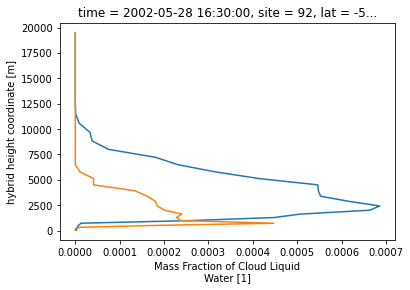

In [53]:
ds_prospective = ds.isel(time=30129).sel(site=92)
ds_prospective = ds_prospective.isel(lev=ds_prospective.lev<2e4)
ds_prospective['cli'].plot(y='lev')
ds_prospective['clw'].plot(y='lev')

In [70]:
ds_prospective

<xarray.Dataset>
Dimensions:  (lev: 38)
Coordinates:
    time     object 2006-02-14 09:30:00
    site     int32 82
  * lev      (lev) float64 20.0 80.0 180.0 ... 2.922e+04 3.291e+04 3.925e+04
    lat      float32 dask.array<chunksize=(), meta=np.ndarray>
    lon      float32 dask.array<chunksize=(), meta=np.ndarray>
Data variables:
    zg       (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    ta       (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    hus      (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    ua       (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    va       (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    wap      (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    cl       (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    cli      (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    clw      (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    hur      (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    tnta     (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    tnhusa   (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    tntr     (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    ps       float32 dask.array<chunksize=(), meta=np.ndarray>
    ts       float32 dask.array<chunksize=(), meta=np.ndarray>
    rsdt     float32 dask.array<chunksize=(), meta=np.ndarray>
    hfls     float32 dask.array<chunksize=(), meta=np.ndarray>
    hfss     float32 dask.array<chunksize=(), meta=np.ndarray>
    pfull    (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    pr       float32 dask.array<chunksize=(), meta=np.ndarray>
    alpha    (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    tntwork  (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    tntva    (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    tnhusva  (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    tntha    (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
    tnhusha  (lev) float32 dask.array<chunksize=(38,), meta=np.ndarray>
Attributes:
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    institute_id:           MOHC
    experiment_id:          amip
    source:                 HadGEM2-A (2009) atmosphere: HadGAM2 (N96L38);  l...
    model_id:               HadGEM2-A
    forcing:                GHG, Oz, SA, LU, Sl, Vl, BC, OC, (GHG = CO2, N2O,...
    parent_experiment_id:   N/A
    parent_experiment_rip:  N/A
    branch_time:            0.0
    contact:                chris.d.jones@metoffice.gov.uk,  mark.webb@metoff...
    history:                MOHC pp to CMOR/NetCDF convertor (version 1.10.4)...
    references:             Bellouin N. et al, (2007) Improved representation...
    initialization_method:  1
    physics_version:        1
    tracking_id:            0f5ad0f6-e54a-480b-a1f7-1674f2394457
    mo_runid:               akpcd
    product:                output
    experiment:             AMIP
    frequency:              subhr
    creation_date:          2011-12-18T02:38:09Z
    Conventions:            CF-1.4
    project_id:             CMIP5
    table_id:               Table cfSites (26 July 2011) 76cc5a96989ebb70010f...
    title:                  HadGEM2-A model output prepared for CMIP5 AMIP
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.7.1

<xarray.DataArray 'hus' ()>
array(3.022542e-06, dtype=float32)
Coordinates:
    time     object 2002-07-17 23:00:00
    site     int32 92
    lat      float32 -58.5
    lon      float32 254.4


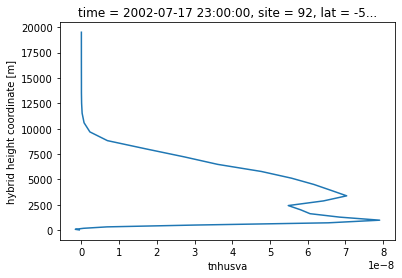

In [30]:
print(ds_prospective['hus'].min().compute())
ds_prospective['tnhusva'].plot(y='lev')

In [169]:
ds_prospective

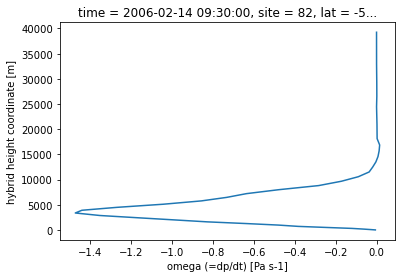

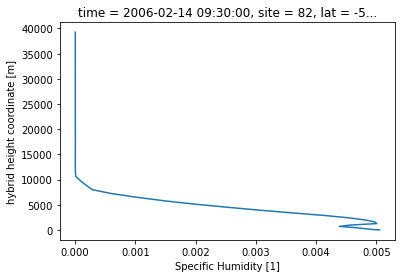

In [59]:
ds_prospective = ds.isel(time=94243).sel(site=82)
ds_prospective['wap'].plot(y='lev')
plt.figure()
ds_prospective['hus'].plot(y='lev')


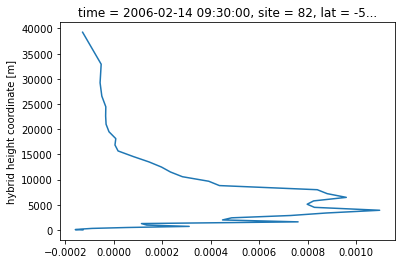

In [60]:
ds_prospective = ds.isel(time=94243).sel(site=82)
temp_tendency = ds_prospective['tntha'] + ds_prospective['tntva'] + ds_prospective['tntr']
temp_tendency.plot(y='lev')

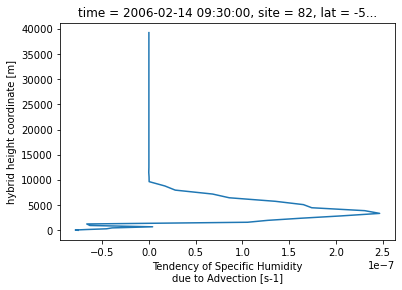

In [69]:
ds_prospective = ds.isel(time=94243).sel(site=82)
qt_tendency = ds_prospective['tnhusa'] #+ ds_prospective['tnhusva']
qt_tendency.plot(y='lev')

In [147]:
ds_prospective['hfls'].compute(), ds_prospective['hfss'].compute()



(<xarray.DataArray 'hfls' ()>
 array(77.47248077)
 Coordinates:
     time     object 2006-02-14 09:30:00
     site     int32 82
     lat      float32 -54.6
     lon      float32 158.9
 Attributes:
     standard_name:     surface_upward_latent_heat_flux
     long_name:         Surface Upward Latent Heat Flux
     comment:           includes both evaporation and sublimation
     units:             W m-2
     original_name:     mo: m01s03i234
     cell_methods:      time: point
     cell_measures:     area: areacella
     history:           2011-12-16T14:54:53Z altered by CMOR: replaced missing...
     associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...,
 <xarray.DataArray 'hfss' ()>
 array(27.29864502)
 Coordinates:
     time     object 2006-02-14 09:30:00
     site     int32 82
     lat      float32 -54.6
     lon      float32 158.9
 Attributes:
     standard_name:     surface_upward_sensible_heat_flux
     long_name:         Surface Upward Sensible Heat Flux
  

(0.0, 12500.0)

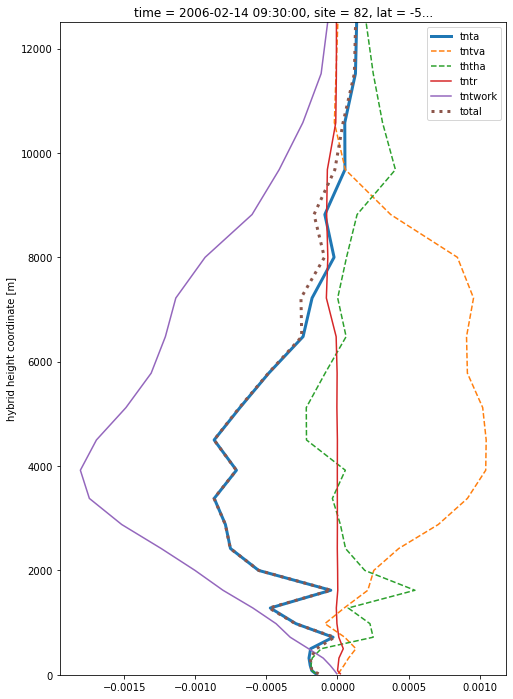

In [129]:
plt.figure(figsize=(8,12))
ds_prospective = ds.isel(time=94243).sel(site=82)
qt_tendency = ds_prospective['tnta'] #+ ds_prospective['tnhusva']
qt_tendency.plot(y='lev',label='tnta',linewidth=3)

qt_tendency = ds_prospective['tntva'] #+ ds_prospective['tnhusva']
qt_tendency.plot(y='lev',label='tntva',linestyle='--')

qt_tendency = ds_prospective['tntha'] #+ ds_prospective['tnhusva']
qt_tendency.plot(y='lev',label='ththa',linestyle='--')

qt_tendency = ds_prospective['tntr'] #+ ds_prospective['tnhusva']
qt_tendency.plot(y='lev',label='tntr')

qt_tendency = ds_prospective['tntwork'] #+ ds_prospective['tnhusva']
qt_tendency.plot(y='lev',label='tntwork')

qt_tendency = ds_prospective['tntva'] + ds_prospective['tntha'] + ds_prospective['tntwork'] +  ds_prospective['tntr']
qt_tendency.plot(y='lev',label='total',linestyle='dotted', linewidth=3)

plt.gca().legend()
plt.gca().set_ylim([0,12500])

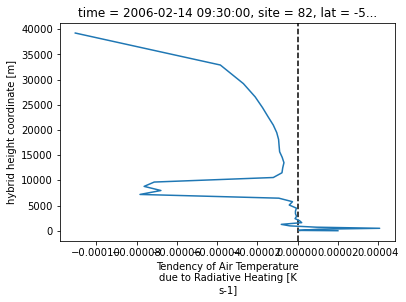

In [143]:
qt_tendency = ds_prospective['tntr'] #+ ds_prospective['tnhusva']
plt.axvline(0,color='k', linestyle='--',zorder=0)
qt_tendency.plot(y='lev',label='tntr')

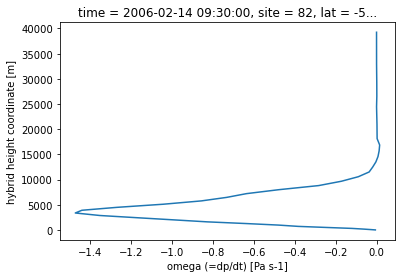

In [125]:
qt_tendency = ds_prospective['wap'] #+ ds_prospective['tnhusva']
(qt_tendency).plot(y='lev',label='wap',xscale='linear')

In [79]:
ds_prospective

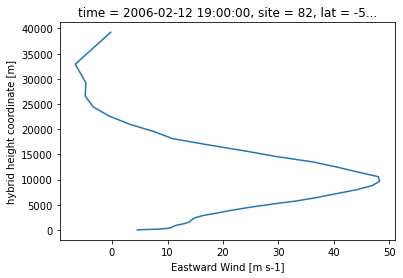

In [18]:
%matplotlib inline
plt.figure()
ds_prospective = ds.isel(time=94166).sel(site=82)
ds_prospective
ds_prospective['ua'].plot(y='lev')

In [22]:
ds_prospective = ds.isel(time=94243).sel(site=82)
('hfls', ds_prospective['hfls'].compute(), 'hfss',ds_prospective['hfss'].compute())

('hfls',
 <xarray.DataArray 'hfls' ()>
 array(77.47248077)
 Coordinates:
     time     object 2006-02-14 09:30:00
     site     int32 82
     lat      float32 -54.6
     lon      float32 158.9
 Attributes:
     standard_name:     surface_upward_latent_heat_flux
     long_name:         Surface Upward Latent Heat Flux
     comment:           includes both evaporation and sublimation
     units:             W m-2
     original_name:     mo: m01s03i234
     cell_methods:      time: point
     cell_measures:     area: areacella
     history:           2011-12-16T14:54:53Z altered by CMOR: replaced missing...
     associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...,
 'hfss',
 <xarray.DataArray 'hfss' ()>
 array(27.29864502)
 Coordinates:
     time     object 2006-02-14 09:30:00
     site     int32 82
     lat      float32 -54.6
     lon      float32 158.9
 Attributes:
     standard_name:     surface_upward_sensible_heat_flux
     long_name:         Surface Upward Sen

In [26]:
ds_prospective = ds.isel(time=94166).sel(site=82)
('hfls', ds_prospective['hfls'].compute(), 'hfss',ds_prospective['hfss'].compute())

('hfls',
 <xarray.DataArray 'hfls' ()>
 array(-10.1670332)
 Coordinates:
     time     object 2006-02-12 19:00:00
     site     int32 82
     lat      float32 -54.6
     lon      float32 158.9
 Attributes:
     standard_name:     surface_upward_latent_heat_flux
     long_name:         Surface Upward Latent Heat Flux
     comment:           includes both evaporation and sublimation
     units:             W m-2
     original_name:     mo: m01s03i234
     cell_methods:      time: point
     cell_measures:     area: areacella
     history:           2011-12-16T14:54:53Z altered by CMOR: replaced missing...
     associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...,
 'hfss',
 <xarray.DataArray 'hfss' ()>
 array(-12.45851898)
 Coordinates:
     time     object 2006-02-12 19:00:00
     site     int32 82
     lat      float32 -54.6
     lon      float32 158.9
 Attributes:
     standard_name:     surface_upward_sensible_heat_flux
     long_name:         Surface Upward Se

('hfls',
 <xarray.DataArray 'hfls' ()>
 array(-10.1670332)
 Coordinates:
     time     object 2006-02-12 19:00:00
     site     int32 82
     lat      float32 -54.6
     lon      float32 158.9
 Attributes:
     standard_name:     surface_upward_latent_heat_flux
     long_name:         Surface Upward Latent Heat Flux
     comment:           includes both evaporation and sublimation
     units:             W m-2
     original_name:     mo: m01s03i234
     cell_methods:      time: point
     cell_measures:     area: areacella
     history:           2011-12-16T14:54:53Z altered by CMOR: replaced missing...
     associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...,
 'hfss',
 <xarray.DataArray 'hfss' ()>
 array(-12.45851898)
 Coordinates:
     time     object 2006-02-12 19:00:00
     site     int32 82
     lat      float32 -54.6
     lon      float32 158.9
 Attributes:
     standard_name:     surface_upward_sensible_heat_flux
     long_name:         Surface Upward Se